## Setup

In [4]:
import geopandas as gp
import pandas as pd

# GTFS Import
Importing the GTFS feed with all the stops and stations to display them on a map. This step will allow a first quality assesment of the data. As GTFS is basically a relational database made up of various comma-separated text files, we'll first need to make sure pandas and geopandas can read them properly. The first file we'll look at is `stops.txt`, because it is the only that actually contains geo-referenced data, the stop locations. All the other files in the GTFS feed are referencing these stops to create relations between them

In [7]:
stops_dataframe = pd.read_csv("2022-07-26_RNV_GTFS_Schedule\\stops.txt")
stops_dataframe.to_csv("stops.csv")

Now we have the GTFS stop file as a .csv. we need to make sure the columns stop_lon, and stop_lat are converted to a format that geopandas can work with

In [12]:
stops_geoframe = gp.GeoDataFrame(stops_dataframe, geometry=gp.points_from_xy(stops_dataframe.stop_lat, stops_dataframe.stop_lon) )
print(stops_geoframe.head())

   stop_id             stop_name   stop_lat  stop_lon  location_type  \
0    11601  Bad Dürkheim Bahnhof  49.461528  8.170429              0   
1    13401      Bad Dürkheim Ost  49.463490  8.185206              0   
2    13402      Bad Dürkheim Ost  49.463420  8.184254              0   
3    51501    Dossenheim Bahnhof  49.448191  8.670171              0   
4    51502    Dossenheim Bahnhof  49.448553  8.669533              0   

  platform_code                  geometry  
0             1  POINT (49.46153 8.17043)  
1             1  POINT (49.46349 8.18521)  
2             2  POINT (49.46342 8.18425)  
3             1  POINT (49.44819 8.67017)  
4             2  POINT (49.44855 8.66953)  


Let's try and plot this

<AxesSubplot:>

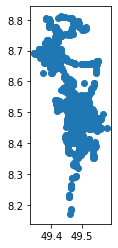

In [13]:
stops_geoframe.plot()

Well we do have a sensible plot, but we might need some more data to really read it